Para começar, vamos criar o banco de dados "vacinados", utilizando os dados da API do data-set escolhido.


In [8]:
import requests
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


def create_vacinados_db():
    # URL da API
    url = f"http://dados.recife.pe.gov.br/api/3/action/datastore_search?&resource_id=ca7fb968-3a2c-44ff-a2e8-730d1a689407&limit=300000"

    # Fazer a requisição à API
    response = requests.get(url)
    data = response.json()

    if 'result' in data and 'records' in data['result']:
        vacinados = data['result']['records']
    else:
        print("Erro: Não foi possível obter os dados da API.")
        return


    # Criar ou conectar ao banco de dados SQLite
    conn = sqlite3.connect('vacinados.db')
    c = conn.cursor()

    # Criar a tabela, se não existir
    c.execute('''
    CREATE TABLE IF NOT EXISTS vacinados (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    faixa_etaria TEXT,
    idade NUMERIC,
    sexo TEXT,
    raca_cor TEXT,
    municipio TEXT,
    grupo TEXT,
    categoria TEXT,
    lote TEXT,
    vacina_fabricante TEXT,
    descricao_dose NUMERIC,
    cnes TEXT,
    sistema_origem TEXT,
    data_vacinacao TIMESTAMP
    );
    ''')



    # Inserir dados no banco de dados
    for vacina in vacinados:
        c.execute('''
        INSERT INTO vacinados (faixa_etaria, idade, sexo, raca_cor, municipio, grupo, categoria, lote, vacina_fabricante, descricao_dose, cnes, sistema_origem, data_vacinacao)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);
        ''', (
            vacina.get('faixa_etaria', ''),
            vacina.get('idade', 0),
            vacina.get('sexo', ''),
            vacina.get('raca_cor', ''),
            vacina.get('municipio', ''),
            vacina.get('grupo', ''),
            vacina.get('categoria', ''),
            vacina.get('lote', ''),
            vacina.get('vacina_fabricante', ''),
            vacina.get('descricao_dose', 0),
            vacina.get('cnes', ''),
            vacina.get('sistema_origem', ''),
            vacina.get('data_vacinacao', '')
        ))

    # Commitar as mudanças e fechar a conexão
    conn.commit()
    conn.close()

# Exemplo de uso chamando a função para criar com todos os registros da API
create_vacinados_db()




Agora vamos criar uma nova conexão com o banco de dados para fazermos consultas:

In [12]:
connection = sqlite3.connect('vacinados.db')

# Criando uma variavel que recebe todo o valor da leitura

vc = pd.read_sql_query("select * from vacinados where municipio like '%recife%';", connection)






Vamos começar nossa análise exploratória:

In [11]:
vc.info()
# um comando que vai dar as informações gerais da nossa base de dados, valores nulos e tipos de dados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291943 entries, 0 to 291942
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 291943 non-null  int64  
 1   faixa_etaria       291943 non-null  object 
 2   idade              291942 non-null  float64
 3   sexo               291943 non-null  object 
 4   raca_cor           291943 non-null  object 
 5   municipio          291943 non-null  object 
 6   grupo              291943 non-null  object 
 7   categoria          291943 non-null  object 
 8   lote               291943 non-null  object 
 9   vacina_fabricante  291943 non-null  object 
 10  descricao_dose     291943 non-null  int64  
 11  cnes               291943 non-null  object 
 12  sistema_origem     291943 non-null  object 
 13  data_vacinacao     291943 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 31.2+ MB


Agora outro comando que nos fornece um resumo estatistico do nosso banco:

Contagem (count): número de observações não nulas.

Média (mean): média aritmética dos valores.

Desvio padrão (std): medida de dispersão em torno da média.

Valor mínimo (min): menor valor na variável.

Quartis (25%, 50%, 75%): valores que dividem a distribuição em quartis, representando o primeiro quartil (Q1), mediana (Q2) e terceiro quartil (Q3).

Valor máximo (max): maior valor na variável.

In [ ]:
vc.describe()

,id,idade,descricao_dose
count,300000.000000,299999.000000,300000.000000
mean,150000.500000,36.958233,2.643120
std,86602.684716,21.554643,1.028601
min,1.000000,-952.000000,1.000000
25%,75000.750000,16.000000,2.000000
50%,150000.500000,40.000000,3.000000
75%,225000.250000,55.000000,3.000000
max,300000.000000,118.000000,5.000000


Agora vamos utilizar o comando display para mostrar os 5 primeiros e os 5 últimos dados e também a quantidade de informações que temos:

In [ ]:
display(vc)

,id,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao
0,1,40 a 44 anos,40.0,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,222VCD045W,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),3,DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO,Conecta Recife,2022-09-14T00:00:00
1,2,70 a 74 anos,73.0,FEMININO,BRANCA,RECIFE,IDOSOS,,FN9607,3 - COMIRNATY (PFIZER),4,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2022-06-12T00:00:00
2,3,30 a 34 anos,33.0,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,FM2948,3 - COMIRNATY (PFIZER),3,DS 4: CNES: 0000639 - UBS JOAQUIM CAVALCANTE,Conecta Recife,2022-03-30T00:00:00
3,4,60 a 64 anos,60.0,FEMININO,PRETA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,21PVCD362W,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),4,DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO,Conecta Recife,2022-07-19T00:00:00
4,5,35 a 39 anos,38.0,FEMININO,PRETA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,221VCDO32Z,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),4,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,ESUS,2022-08-18T00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299996,55 a 59 anos,57.0,FEMININO,PARDA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,FK8911,3 - COMIRNATY (PFIZER),3,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2022-01-13T00:00:00
299996,299997,45 a 49 anos,49.0,MASCULINO,PRETA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,FM2951,3 - COMIRNATY (PFIZER),3,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2022-01-28T00:00:00
299997,299998,50 a 54 anos,54.0,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,205H21A,4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON),2,DS 1: CNES: 000507 - POLICLÍNICA GOUVEIA DE BA...,Conecta Recife,2022-01-12T00:00:00
299998,299999,60 a 64 anos,60.0,FEMININO,PRETA,RECIFE,PESSOAS COM COMORBIDADES,OUTRAS,201H21A,4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON),3,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,Conecta Recife,2022-03-24T00:00:00


(300000, 14)

Agora para visualizar o periodo da analise:

In [ ]:
inicio = pd.to_datetime(vc['data_vacinacao']).dt.date.min()
print("Data de inicio", inicio)
fim = pd.to_datetime(vc['data_vacinacao']).dt.date.max()
print("Data final", fim)

Data de inicio 2022-01-03
Data final 2022-12-31


# Consultas de dados

In [16]:
pd.read_sql("select * from vacinados where sexo like '%outros%'", connection)

,id,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao
0,34,80 a 84 anos,80,OUTROS,BRANCA,RECIFE,IDOSOS,,21PVCD362W,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),4,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,Conecta Recife,2022-07-08T00:00:00
1,35,80 a 84 anos,80,OUTROS,BRANCA,RECIFE,IDOSOS,,FT5177,3 - COMIRNATY (PFIZER),4,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,Conecta Recife,2022-12-14T00:00:00
2,134,80 a 84 anos,80,OUTROS,BRANCA,RECIFE,IDOSOS,,21PVCD362W,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),4,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,Conecta Recife,2022-07-08T00:00:00
3,135,80 a 84 anos,80,OUTROS,BRANCA,RECIFE,IDOSOS,,FT5177,3 - COMIRNATY (PFIZER),4,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,Conecta Recife,2022-12-14T00:00:00
4,234,80 a 84 anos,80,OUTROS,BRANCA,RECIFE,IDOSOS,,21PVCD362W,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),4,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,Conecta Recife,2022-07-08T00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,298481,55 a 59 anos,55,OUTROS,PARDA,RECIFE,TRABALHADORES DA EDUCAÇÃO,REDE PRIVADA - ENSINO FUNDAMENTAL,205F21A,4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON),3,DS 8: CNES: 0001198 - UBT ARISTARCHO DE AZEVEDO,Conecta Recife,2022-02-17T00:00:00
417,299791,65 a 69 anos,67,OUTROS,PARDA,RECIFE,IDOSOS,,FP8073,3 - COMIRNATY (PFIZER),3,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2022-03-28T00:00:00
418,300065,55 a 59 anos,56,OUTROS,PARDA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),OUTRAS,FM2967,3 - COMIRNATY (PFIZER),3,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,Conecta Recife,2022-02-08T00:00:00
419,300134,55 a 59 anos,59,OUTROS,PARDA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,FM2948,3 - COMIRNATY (PFIZER),2,DS 4: CNES: 0000639 - UBS JOAQUIM CAVALCANTE,Conecta Recife,2022-03-25T00:00:00


Exibição de grafico das vacinas fabricadas por mais usadas

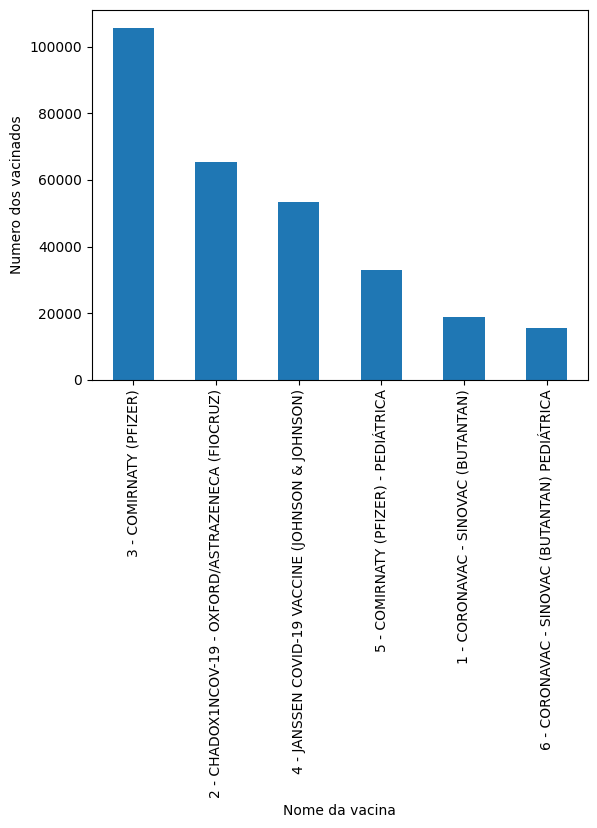

In [21]:
vc_vacina = vc.vacina_fabricante.value_counts()
vc_vacina.plot(kind='bar')
plt.xlabel('Nome da vacina')
plt.ylabel('Numero dos vacinados')
plt.show()

<Axes: xlabel='sexo'>

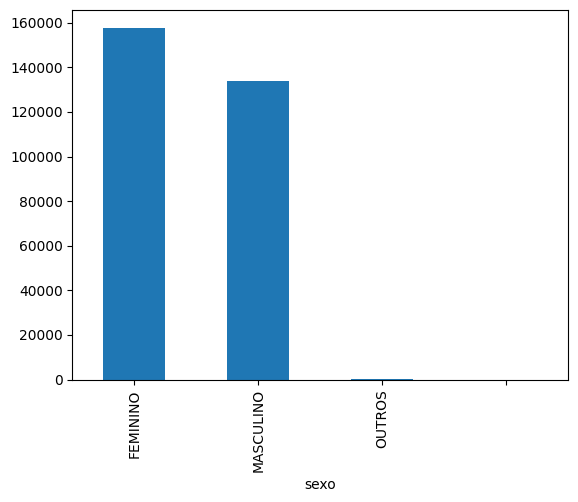

In [15]:
vc_sexo = vc.sexo.value_counts()
vc_sexo.plot(kind='bar')

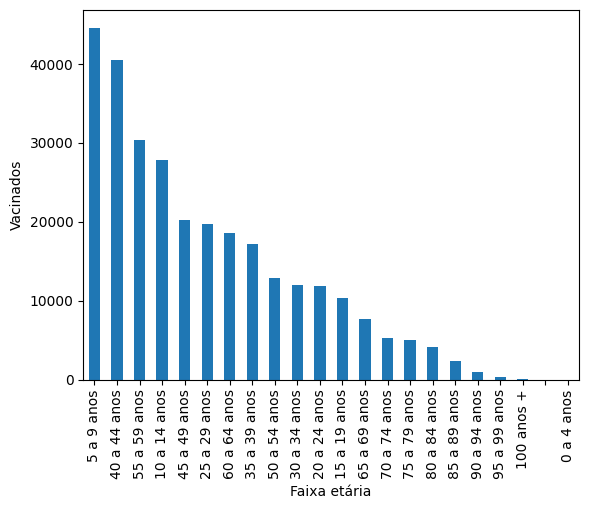

In [18]:
vc_idade = vc.faixa_etaria.value_counts()
vc_idade.plot(kind='bar')
plt.xlabel('Faixa etária')
plt.ylabel('Vacinados')
plt.show()

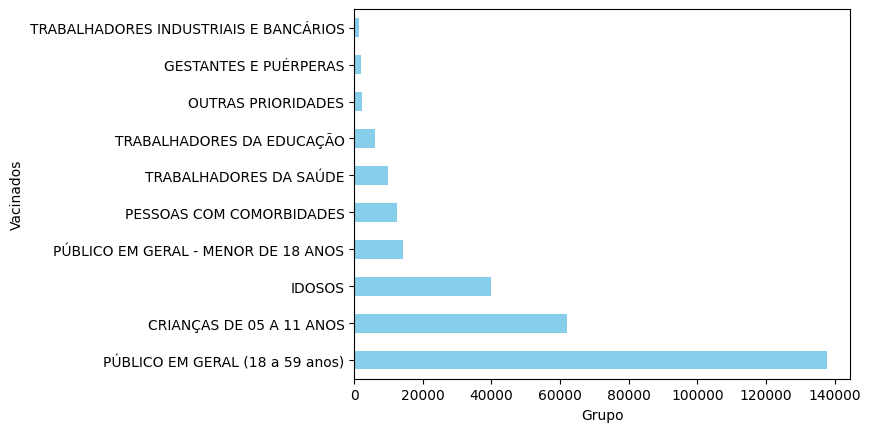

In [36]:
vc_grupo = vc.grupo.value_counts().head(10)
vc_grupo.plot(kind='barh', color='skyblue')
plt.xlabel('Grupo')
plt.ylabel('Vacinados')
plt.show()

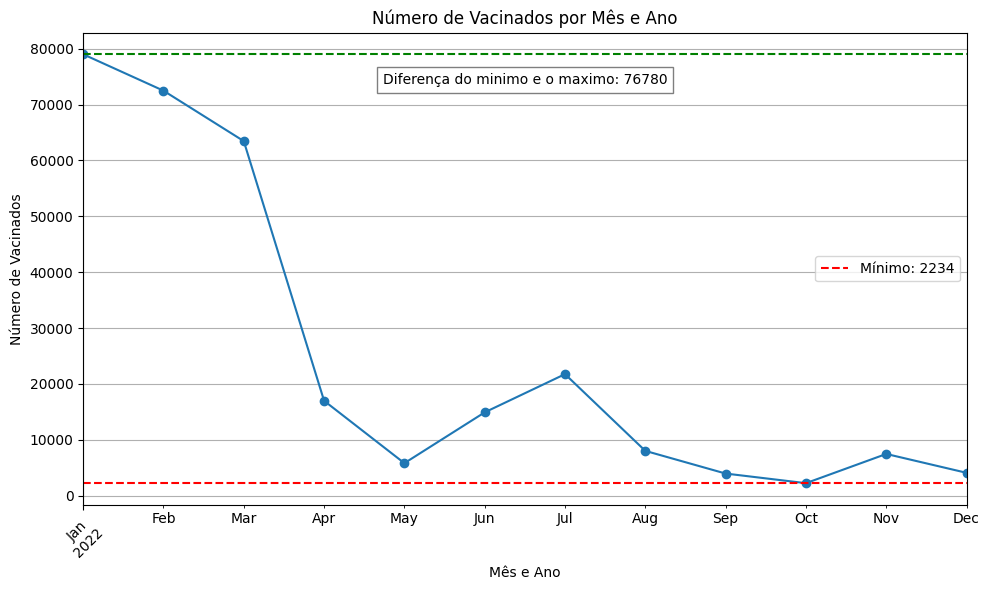

In [31]:
def get_vacinados_data():
    conn = sqlite3.connect('vacinados.db')
    query = "SELECT data_vacinacao FROM vacinados"
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df
def plot_vacinados_por_mes_ano():
    df = get_vacinados_data()

    # Converter a coluna 'data_vacinacao' para o formato datetime
    df['data_vacinacao'] = pd.to_datetime(df['data_vacinacao'])

    # Extrair o mês e o ano
    df['mes_ano'] = df['data_vacinacao'].dt.to_period('M')

    # Agrupar por mês e ano e calcular a contagem de vacinados
    vacinados_por_mes_ano = df.groupby('mes_ano').size()

    # Plotar o gráfico
    plt.figure(figsize=(10, 6))
    vacinados_por_mes_ano.plot(kind='line', marker='o', linestyle='-')

    # Marcar o mínimo
    minimo = vacinados_por_mes_ano.min()
    plt.axhline(y=minimo, color='r', linestyle='--', label=f'Mínimo: {minimo}')
    plt.legend()

    maximo = vacinados_por_mes_ano.max()
    plt.axhline(y=maximo, color='g', linestyle='--', label=f'Máximo: {maximo}')
    diff = maximo - minimo

    # Adicionar texto indicando a diferença
    texto_diff = f'Diferença do minimo e o maximo: {diff}'
    plt.text(0.5, 0.9, texto_diff, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

    plt.title('Número de Vacinados por Mês e Ano')
    plt.xlabel('Mês e Ano')
    plt.ylabel('Número de Vacinados')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_vacinados_por_mes_ano()
